# Mod 3 Final Project

## Student Info

- Name: 
- Cohort: 
- Instructor:


## Instructions:

- Open and read the project assignment and guidelines in `MOD_PROJECT_README.ipynb`
- Review the hypothesis testing workflow found in this repo's `README.md` and at the bottom of the `MOD_PROJECT_README.ipynb`
- 3 functions from study group/learn.co lessons have been provided inside `functions.py`
    - `Cohen_d`, `find_outliers_IQR`,`find_outliers_Z`

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png">

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

import pandas as pd


fsds_1007219  v0.7.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


In [2]:
from functions import Cohen_d, find_outliers_IQR,find_outliers_Z

## Uncomment the line below to see the source code for the imported functions
# fs.ihelp(Cohen_d,False),fs.ihelp(find_outliers_IQR,False), fs.ihelp(find_outliers_Z,False)

In [3]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()

In [4]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


# HYPOTHESIS 1

> ***Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?***

- $H_0$:
- $H_1$:

# Hypothesis 2


> ***Does discount amount have a statistically significant effect on the total spent ($) on a product in an order? If so, at what level(s) of discount?***

In [5]:
cur.execute("""SELECT * from OrderDetail""")
col_names = [x[0] for x in cur.description]
df = pd.DataFrame(cur.fetchall(),columns=col_names)#, columns=['Table'])

df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [6]:
## Create 'discounted' column for groupby 
df['discounted'] = df['Discount']>0
df['discounted'] = df['discounted'].map({True:'Discounted',False:'Full Price'})
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,Full Price
1,10248/42,10248,42,9.80,10,0.00,Full Price
2,10248/72,10248,72,34.80,5,0.00,Full Price
3,10249/14,10249,14,18.60,9,0.00,Full Price
4,10249/51,10249,51,42.40,40,0.00,Full Price
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted
2151,11077/66,11077,66,17.00,1,0.00,Full Price
2152,11077/73,11077,73,15.00,2,0.01,Discounted
2153,11077/75,11077,75,7.75,4,0.00,Full Price


In [7]:
## Create TotalSpent column
df['Total Spent'] = df['UnitPrice'] * df['Quantity']
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted,Total Spent
0,10248/11,10248,11,14.00,12,0.00,Full Price,168.0
1,10248/42,10248,42,9.80,10,0.00,Full Price,98.0
2,10248/72,10248,72,34.80,5,0.00,Full Price,174.0
3,10249/14,10249,14,18.60,9,0.00,Full Price,167.4
4,10249/51,10249,51,42.40,40,0.00,Full Price,1696.0
...,...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted,66.5
2151,11077/66,11077,66,17.00,1,0.00,Full Price,17.0
2152,11077/73,11077,73,15.00,2,0.01,Discounted,30.0
2153,11077/75,11077,75,7.75,4,0.00,Full Price,31.0


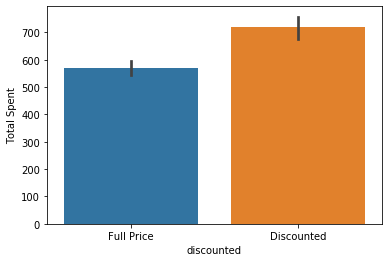

In [8]:
sns.barplot(data=df, x='discounted',y='Total Spent',ci=68,)

In [9]:
grps = {}
for grp_name in df['discounted'].unique():
    grps[grp_name] = df.groupby('discounted').get_group(grp_name)['Total Spent']
    
grps

{'Full Price': 0        168.0
 1         98.0
 2        174.0
 3        167.4
 4       1696.0
          ...  
 2147      14.0
 2148      48.0
 2151      17.0
 2153      31.0
 2154      26.0
 Name: Total Spent, Length: 1317, dtype: float64, 'Discounted': 6       1484.0
 7        252.0
 8        100.8
 9        234.0
 11      2592.0
          ...  
 2144      36.0
 2146      36.0
 2149      68.0
 2150      66.5
 2152      30.0
 Name: Total Spent, Length: 838, dtype: float64}

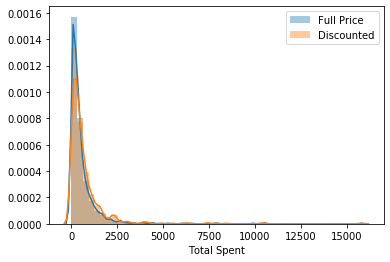

In [10]:
[sns.distplot(v,label=k) for k,v in grps.items()]
plt.legend()

In [11]:
for grp_name,grp_data in grps.items():
    idx_outs = find_outliers_Z(grp_data)
    print(f"[i] Found {idx_outs.sum()} outliers using Z-score method for {grp_name}.")
    grps[grp_name] = grp_data[~idx_outs]
    
    

[i] Found 19 outliers using Z-score method for Full Price.
[i] Found 13 outliers using Z-score method for Discounted.


[Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Total Spent on Full Price vs Discounted Products')]

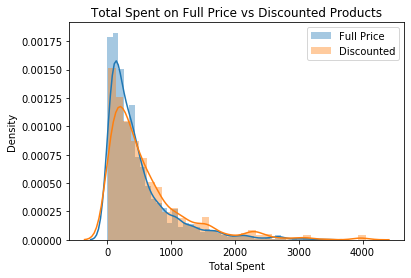

In [12]:
[sns.distplot(v,label=k) for k,v in grps.items()]
ax = plt.gca()
ax.legend()
ax.set(title='Total Spent on Full Price vs Discounted Products',
ylabel='Density')


In [13]:
import scipy.stats as stats

In [14]:
for k,v in grps.items():
    stat,p = stats.normaltest(v)
    print(f"Group {k} Normaltest p-value={round(p,4)}")
    sig = 'is NOT' if p<.05 else 'IS'

    print(f"\t-The data {sig} normal.")

Group Full Price Normaltest p-value=0.0
	-The data is NOT normal.
Group Discounted Normaltest p-value=0.0
	-The data is NOT normal.


In [15]:
data=[]
for k,v in grps.items():

    data.append(v.values)


In [16]:


stat,p = stats.levene(*data)
print(f"Levene' Test for Equal Variance p-value={round(p,4)}")
sig = 'do NOT' if p<.05 else 'DO'

print(f"\t-The groups {sig} have equal variance.")

Levene' Test for Equal Variance p-value=0.0
	-The groups do NOT have equal variance.


In [17]:
stat,p = stats.mannwhitneyu(data[0],data[1])
print(f"Mann Whitney U p-value={round(p,4)}")

Mann Whitney U p-value=0.0


In [18]:
# df_data = pd.concat([*grps.values()],axis=0)
# df_data

In [24]:
df_grp = pd.DataFrame(grps['Full Price'])
df_grp['group']='Full Price'
df_grp

,Total Spent,group
0,168.0,Full Price
1,98.0,Full Price
2,174.0,Full Price
3,167.4,Full Price
4,1696.0,Full Price
...,...,...
2147,14.0,Full Price
2148,48.0,Full Price
2151,17.0,Full Price
2153,31.0,Full Price


In [29]:
def prepare_for_tukeys(grps):
    df_tukey= pd.DataFrame()
    for k,v in grps.items():
        df_grp = pd.DataFrame(v)
        df_grp['Group']=k
        df_tukey = pd.concat([df_tukey,df_grp],axis=0)

    return df_tukey

In [33]:
df_tukey = prepare_for_tukeys(grps)
df_tukey

,Total Spent,Group
0,168.0,Full Price
1,98.0,Full Price
2,174.0,Full Price
3,167.4,Full Price
4,1696.0,Full Price
...,...,...
2144,36.0,Discounted
2146,36.0,Discounted
2149,68.0,Discounted
2150,66.5,Discounted


In [35]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# tukeys = pairwise_tukeyhsd(df_tukey['Total Spent'],df_tukey['Group'])
# # tukeys.summary()

In [ ]:
Cohen_d(grps['Full Price'],grps['Discounted'])

## Testing One-Tailed T-Test

In [ ]:
sns.barplot(y=grps['Full Price'])
sns.barplot(x=1, y=grps['Discounted'])

In [ ]:
res = stats.ttest_ind(grps['Full Price'],grps['Discounted'])